In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np

import scipy.optimize as sco

import warnings
warnings.filterwarnings('ignore')

import sklearn.cluster as cl
from sklearn import mixture

data_folder = '../../data/'
path = data_folder + 'GEV_SM/swissmetro.dat'

from classes.MNLogit import *
from helpers.data import *
from helpers.algos import *
from helpers.models import *
import copy

import matplotlib.pyplot as plt

import time
import pickle

import hyperopt
from hyperopt.pyll.base import scope
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import seaborn as sns

import numdifftools as nd

sns.set(font_scale=1.5)

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

seed = 1234

In [3]:
model = load_model(path, 'norm_complex')
x = np.zeros(len(model.params))

In [4]:
%%time
res_bfgs = sco.minimize(model.negloglikelihood, x, method='BFGS', tol=1e-8, jac=model.neg_grad)

CPU times: user 4.5 s, sys: 0 ns, total: 4.5 s
Wall time: 5.61 s


In [5]:
res_bfgs.x

array([ 0.786179  ,  0.98264685, -0.65596648, -1.04933718, -0.68768718,
       -1.05748236, -0.8000895 , -1.44306552, -1.45576372, -1.79689044])

In [6]:
res_bfgs.fun

0.7908058095403135

# SGD

In [7]:
nbr = 2
draws = 1000

res = {}

In [8]:
dct = {}  

start = time.time()
epochs, xs, lls = line_search_mbSGD(model, x, 2, len(model.df), False)
stop = time.time()

dct['epochs'] = epochs
dct['lls'] = lls
dct['times'] = stop-start

res['GD'] = dct

Start Line search mini batch SGD for 2 epochs (2 iterations)


In [9]:
np.random.seed(seed)

dct = {}

lls = []
times = []
for d in range(draws):
    
    start = time.time()
    ep, x_val, ll = line_search_mbSGD(model, x, nbr, 100, False)
    stop = time.time()
    
    times.append(stop-start)
    lls.append(ll)
    
dct['epochs'] = np.array(ep)
dct['lls'] = np.array(lls)
dct['times'] = np.array(times)

res['SGD-100'] = dct    

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

In [10]:
np.random.seed(seed)

dct = {}

lls = []
times = []
for d in range(draws):
    
    start = time.time()
    ep, x_val, ll = line_search_mbSGD(model, x, nbr, 1000, False)
    stop = time.time()
    
    times.append(stop-start)
    lls.append(ll)
    
dct['epochs'] = np.array(ep)
dct['lls'] = np.array(lls)
dct['times'] = np.array(times)

res['SGD-1000'] = dct  

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Line search mini batch SGD for 2 epochs (19 iterations)
Start Li

In [11]:
with open('../data/res_SGD.p', 'wb') as outfile:
    pickle.dump(res, outfile)

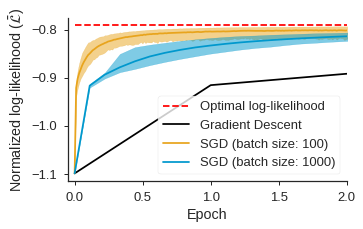

In [12]:
with open('../data/res_SGD.p', 'rb') as infile:
    res = pickle.load(infile)
    
colors = {'SGD-100': (232/255,164/255,29/255), 
          'SGD-1000': (0/255,152/255,205/255)}

labels = {
    'GD': 'Gradient Descent',
    'SGD-100': 'SGD (batch size: 100)',
    'SGD-1000': 'SGD (batch size: 1000)'
}

plt.figure(figsize=(5,3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([res['GD']['epochs'][0], res['GD']['epochs'][-1]], 
        [-res_bfgs.fun, -res_bfgs.fun], 'r--', 
        label='Optimal log-likelihood')

ax.plot(res['GD']['epochs'], res['GD']['lls'], 'k', label=labels['GD'])

for key in ['SGD-100', 'SGD-1000']:
    
    epochs = res[key]['epochs']
    
    plus = []
    minus = []
    avg = []
    
    vals = res[key]['lls']
    
    for i in range(vals.shape[1]):
        avg.append(np.mean(vals[:,i]))
        minus.append(np.percentile(vals[:,i], 5))
        plus.append(np.percentile(vals[:,i], 95))
    
    ax.plot(epochs, avg, linestyle='-', color=colors[key], label=labels[key])
    ax.fill_between(epochs, plus, minus, color=colors[key], alpha=0.5)

plt.xlabel('Epoch')
plt.ylabel('Normalized log-likelihood ($\\bar{\\mathcal{L}}$)')
leg = ax.legend(frameon=True)
ax.set_xlim([-0.05,2])

plt.savefig('../figures/SGD.pdf', bbox_inches='tight')

In [13]:
for algo in res.keys():
    
    avg = {}

    lls = res[algo]['lls']
    
    try:
        tmp = lls[:,-1]

        avg = np.mean(tmp)
    except:
        avg = lls[-1]
        
    print("  LL for {}: {:.6f}".format(algo, avg))

  LL for GD: -0.891737
  LL for SGD-100: -0.801452
  LL for SGD-1000: -0.812886
